In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import sparsity_analysis as spa
%load_ext autoreload
%autoreload 2

## How K_ac sparsity affects population structure

### Produce dataframe of model dynamics with different sparse matrices

In [11]:
sizes = list(range(3,8))
num = 2000
lower, upper = 0.001, 0.01
def sparsity(n): 
    return 0.5
end_time = 200

results = spa.analyze(sizes,
                      num,
                      lower,
                      upper,
                      sparsity,
                      end_time)
print(results.shape)
results.to_csv('../Data/sparsity_analysis.tsv', sep='\t', index=False)
results.head()

size:   0%|          | 0/2 [00:00<?, ?it/s]

sparsity:   0%|          | 0/18 [00:00<?, ?it/s]

init:   0%|          | 0/2000 [00:00<?, ?it/s]

init:   0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
df = pd.read_csv('../Data/sparsity_analysis.tsv', sep='\t')
ids = ['init', 'sparsity', 'size']
df = pd.melt(df,
             id_vars=ids,
             var_name='statistic',
             value_name='value')
df.head()

,init,sparsity,size,statistic,value
0,0,0.25,2,growth_rate,0.007273
1,1,0.25,2,growth_rate,0.004319
2,2,0.25,2,growth_rate,0.007772
3,3,0.25,2,growth_rate,0.005015
4,4,0.25,2,growth_rate,0.008054


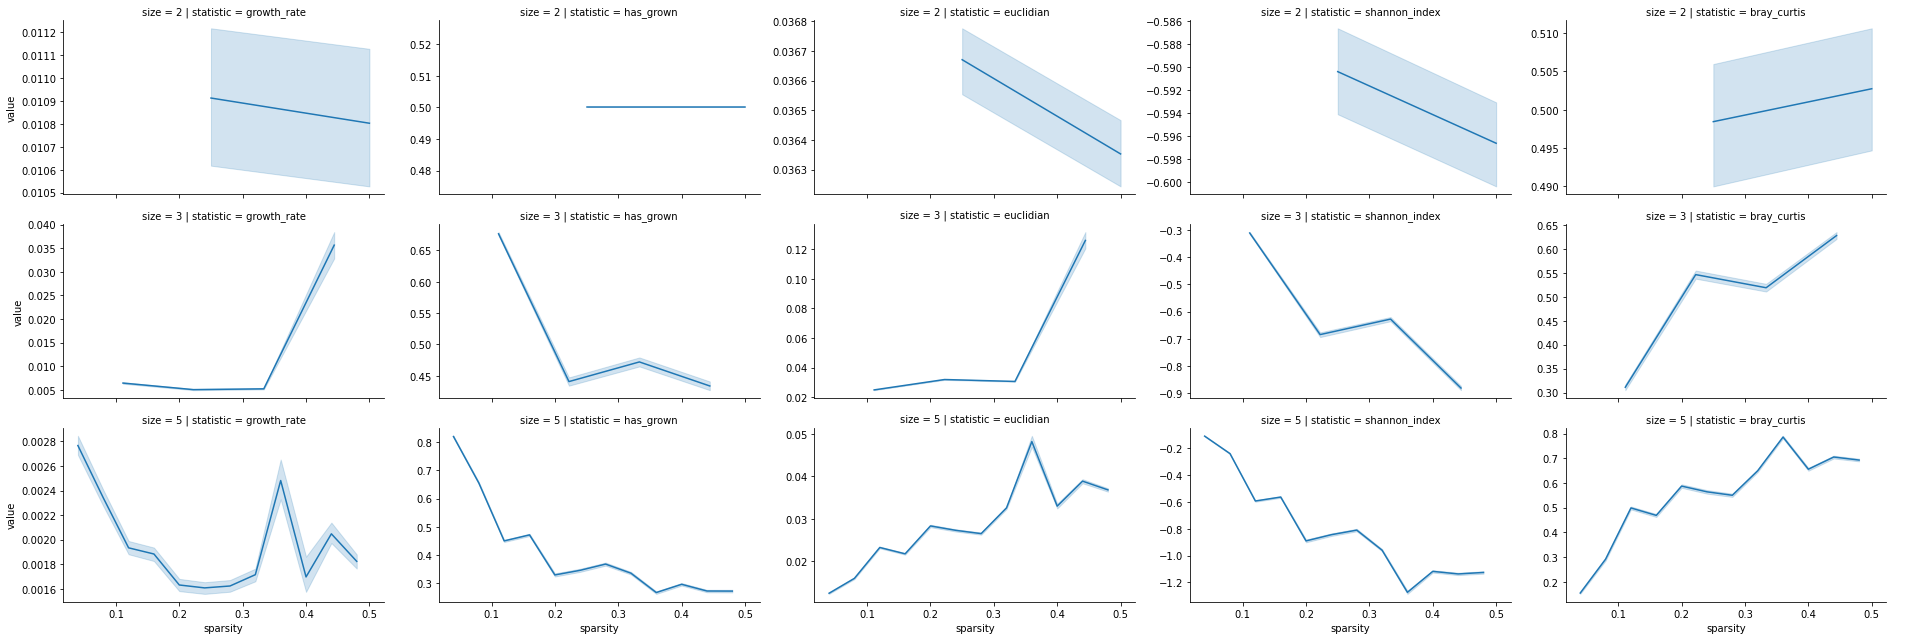

In [10]:
import seaborn as sns
pdf = df[df['size'] != 4] 
pdf = pdf[pdf['statistic'] != 'skew']
plot = sns.FacetGrid(pdf, col='statistic', row='size',
                     sharex=True, sharey=False, aspect=16/9)
plot.map_dataframe(sns.lineplot, x='sparsity', y='value')
plot.add_legend()
plot.tight_layout()
plot.fig.savefig('../Documents/figures/sparsity_analysis.png')